In [1]:
id = 1643221
zoom = 13
interactive = True

In [2]:
# Parameters
id = 1643221
zoom = 13
interactive = False


In [3]:
import copy

from aio_overpass import Client
from aio_overpass.pt import collect_routes, SingleRouteQuery
from aio_overpass.pt_ordered import collect_ordered_routes

query = SingleRouteQuery(id)

client = Client()

await client.run_query(query)
await client.close()


q1 = query
q2 = copy.deepcopy(q1)

route, = collect_routes(query)
view, = collect_ordered_routes(query)

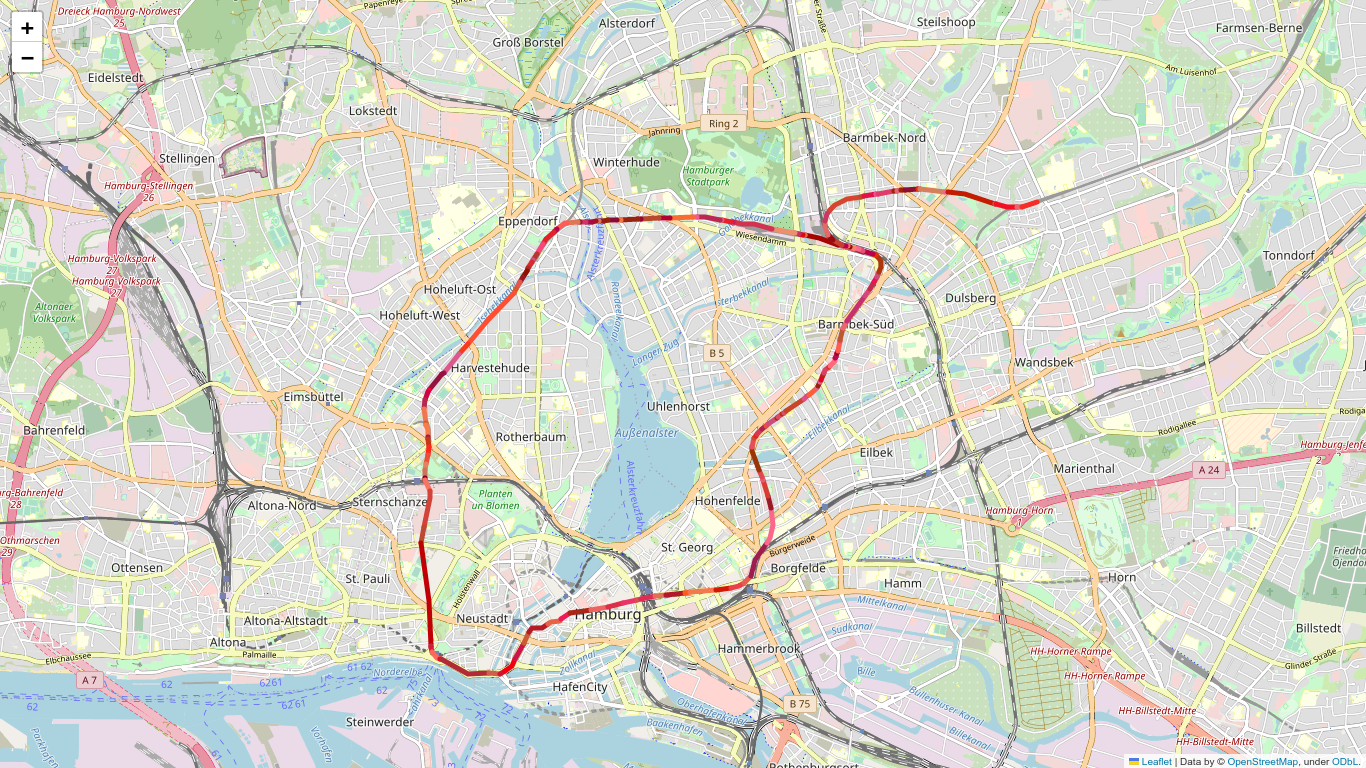

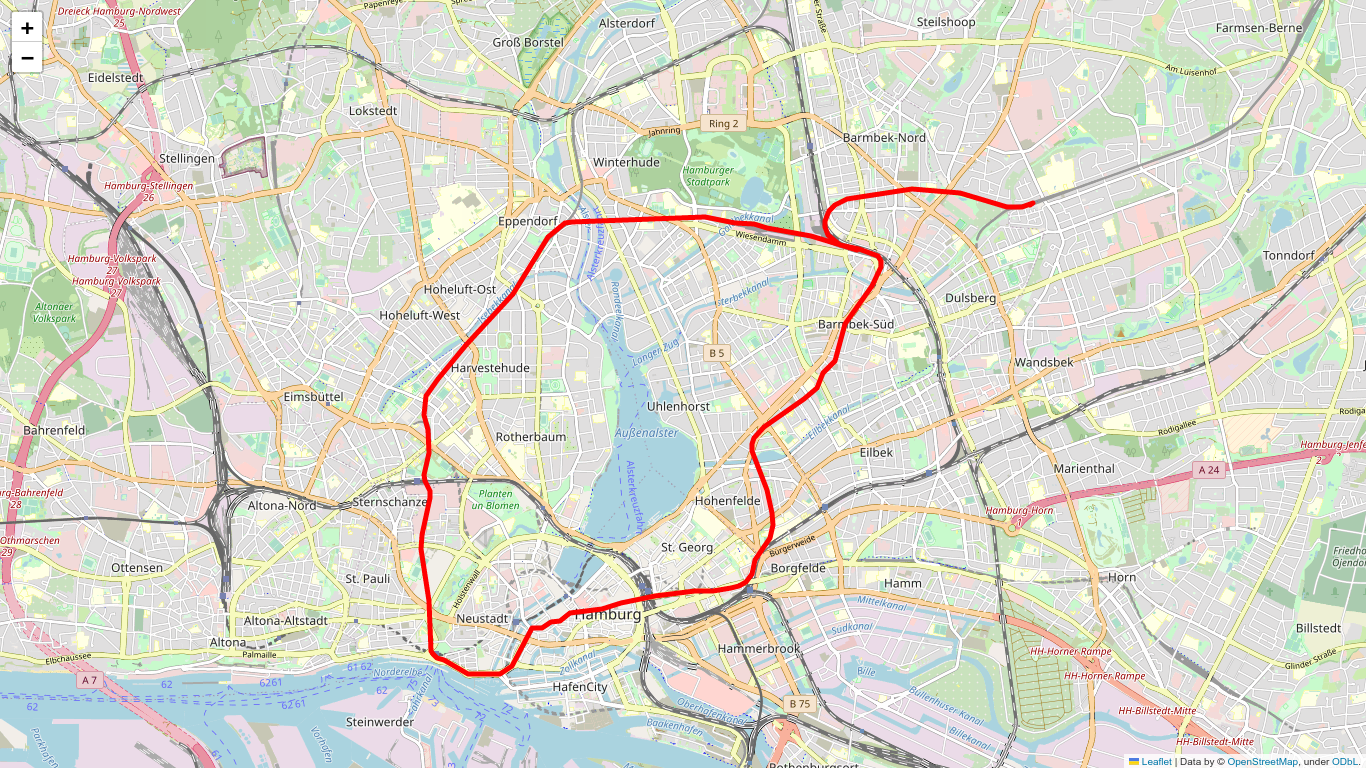

In [4]:
import folium
from folium.vector_layers import PolyLine
import IPython.display
import randomcolor
from shapely.geometry import GeometryCollection

centroid = GeometryCollection([way.geometry for way in route.ways]).centroid

m1 = folium.Map(
    location=centroid.coords[0],
    zoom_start=zoom,
)
m2 = folium.Map(
    location=centroid.coords[0],
    zoom_start=zoom,
)

colors = randomcolor.RandomColor().generate(
    count=len(route.ways),
    luminosity="bright",
    hue="red",
)

for way, color in zip(route.ways, colors):
    line = PolyLine(
        locations=way.geometry.coords,
        allow_intersection=True,
        color=color,
        weight=5,
    )
    line.add_to(m1)

line = PolyLine(
    locations=view.path.coords,
    allow_intersection=True,
    color="red",
    weight=5,
)
line.add_to(m2)

if interactive:
    IPython.display.display(IPython.display.HTML('<h1>Split geometry</h1>'))
    IPython.display.display(m1)
    IPython.display.display(IPython.display.HTML('<h1>Simplified geometry</h1>'))
    IPython.display.display(m2)
else:
    image1 = IPython.display.Image(data=m1._to_png(), format='png', embed=True)
    image2 = IPython.display.Image(data=m2._to_png(), format='png', embed=True)
    IPython.display.display(IPython.display.HTML('<h1>Split geometry</h1>'))
    IPython.display.display(image1)
    IPython.display.display(IPython.display.HTML('<h1>Simplified geometry</h1>'))
    IPython.display.display(image2)